In [2]:
library(BasketballAnalyzeR)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


If you want to reproduce the figures contained in the book of
Zuccolotto and Manisera (2020) and
if the version of your R machine is >= 3.6.0, you need to type
RNGkind(sample.kind = "Rounding")
at the beginning of your working session



In [49]:
# example(shotchart)

In [4]:
data(package="BasketballAnalyzeR")

Package,Item,Title
<chr>,<chr>,<chr>
BasketballAnalyzeR,Obox,Opponents box scores dataset - NBA 2017-2018
BasketballAnalyzeR,PbP.BDB,Play-by-play dataset - NBA 2017-2018
BasketballAnalyzeR,Pbox,Players box scores dataset - NBA 2017-2018
BasketballAnalyzeR,Tadd,Tadd dataset - NBA 2017-2018
BasketballAnalyzeR,Tbox,Teams box scores dataset - NBA 2017-2018


In [5]:
PbP <- PbPmanipulation(PbP.BDB)

## 1 - Basic statiscal analyses
#### 1.1 - Pace, Ratings, Four Factors

In [6]:
tm <- c("BOS", "CLE", "GSW", "HOU")

In [7]:
selTeams <- which(Tadd$team %in% tm)

FF - fourfactors contains a data frame with Possession, Pace (possesions= per minute), Offensive/Defensive Ratings and Four Factors as columns

In [8]:
FF.sel <- fourfactors(Tbox[selTeams,], Obox[selTeams,])

In [22]:
FF.sel

Team,POSS.Off,POSS.Def,PACE.Off,PACE.Def,ORtg,DRtg,F1.Off,F2.Off,F3.Off,F4.Off,F1.Def,F2.Def,F3.Def,F4.Def
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Boston Celtics,8103.68,8110.12,2.045867,2.047493,105.25,101.54,51.76,14.18,21.48,18.75,49.48,14.29,78.44,19.13
Cleveland Cavaliers,8221.96,8229.72,2.083619,2.085585,110.57,109.53,54.70,13.70,20.06,21.41,53.98,13.43,77.27,16.58
Golden State Warriors,8287.92,8457.08,2.100335,2.143203,112.26,104.22,56.91,15.26,21.05,19.48,50.44,13.89,76.31,18.55
Houston Rockets,8208.84,8209.40,2.077661,2.077803,112.23,103.76,55.05,13.83,21.25,23.30,52.14,14.54,79.92,17.12


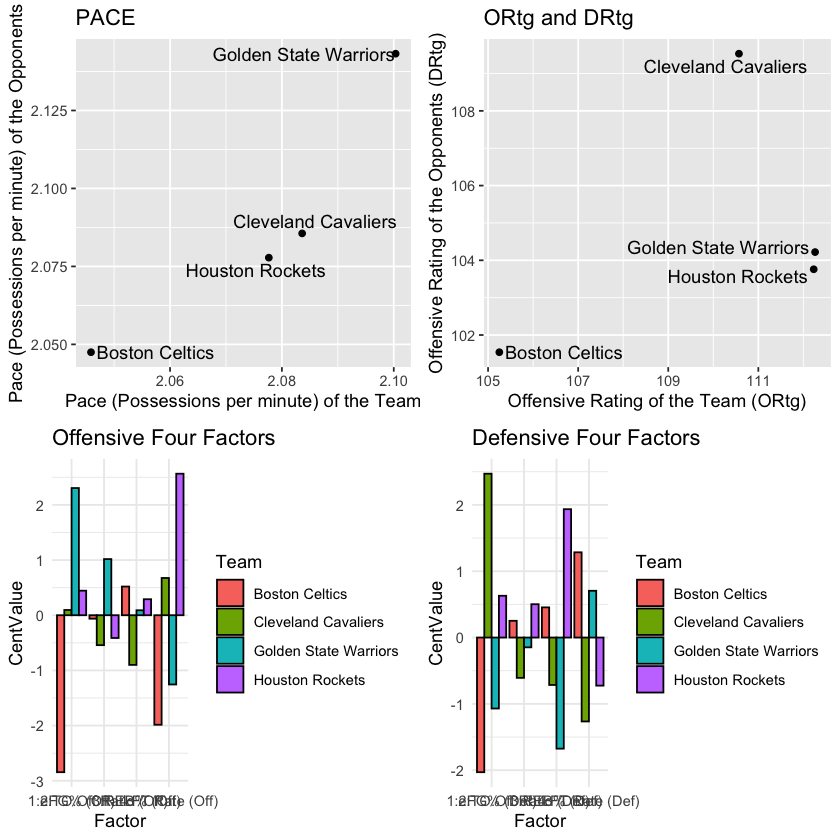

In [23]:
plot(FF.sel)

In [37]:
FF <- fourfactors(Tbox, Obox)

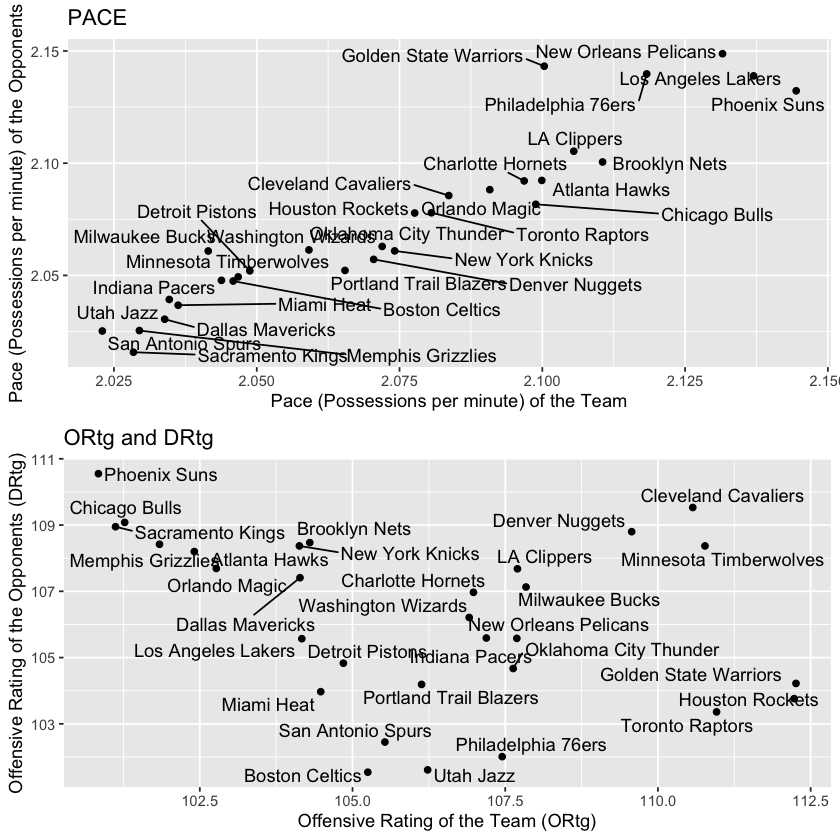

In [38]:
library(gridExtra)
grid.arrange(grobs=listPlots[1:2], ncol=1)

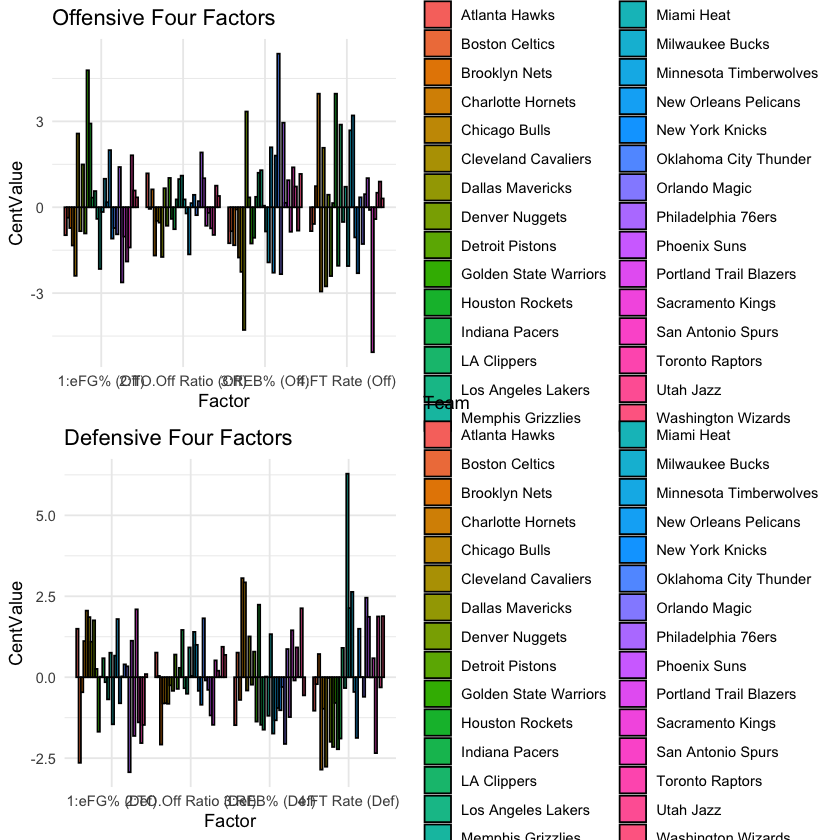

In [30]:
grid.arrange(grobs=listPlots[3:4], ncol=1)

#### 1.2 - Bar-line plots

In [33]:
X <- data.frame(Tbox, PTS.O=Obox$PTS, TOV.O=Obox$TOV,
               CONF=Tadd$Conference)

In [34]:
XW <- subset(X, CONF=="W")

In [35]:
labs <- c("Steals", "Blocks", "Defensive Rebounds")

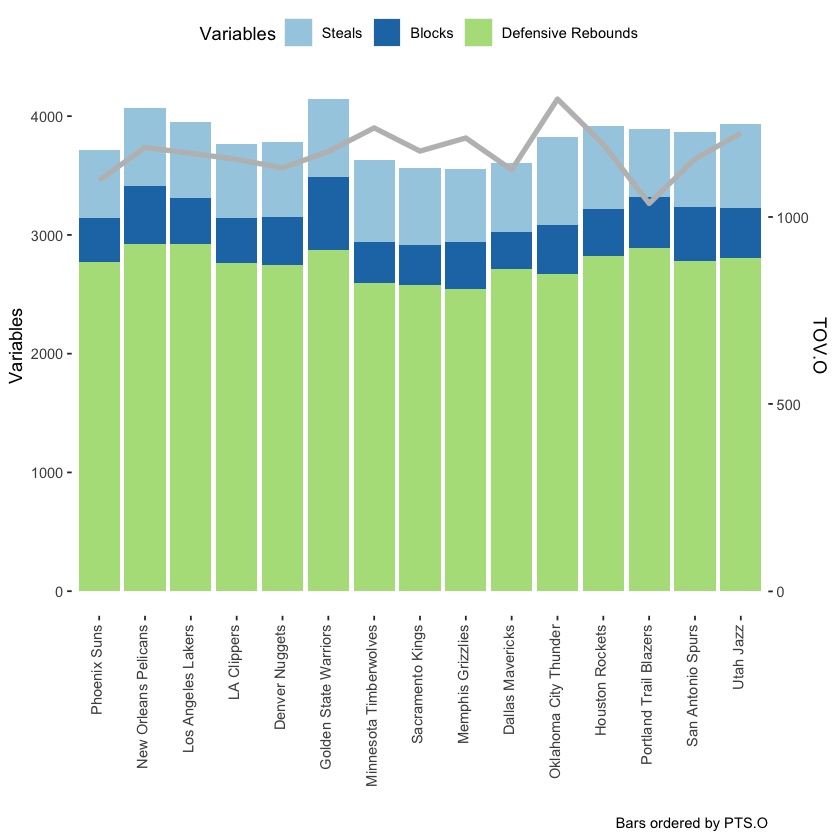

In [36]:
barline(data=XW, id="Team", bars=c("STL", "BLK", "DREB"),
       line="TOV.O", order.by="PTS.O", labels.bars=labs)

Main defensive statistics of the Western Conference NBA teams: steals, blocks, defensive rebounds

The graph does not highlight any evident relationship between statistics and point scored. In fact, the teams towards the left (highest values of points scored by the opponents eg: Phoenix suns PTS.Opp = 9290) are not necessarily those with the lowest bars.

But, player statistics can be represented. Assume we are interested in finding a Houston Rockets player who has played at least 500 minutes, we can draw a bar-line plot for the shooting percentages

In [39]:
Pbox.HR <- subset(Pbox, Team=="Houston Rockets" & MIN>=500)

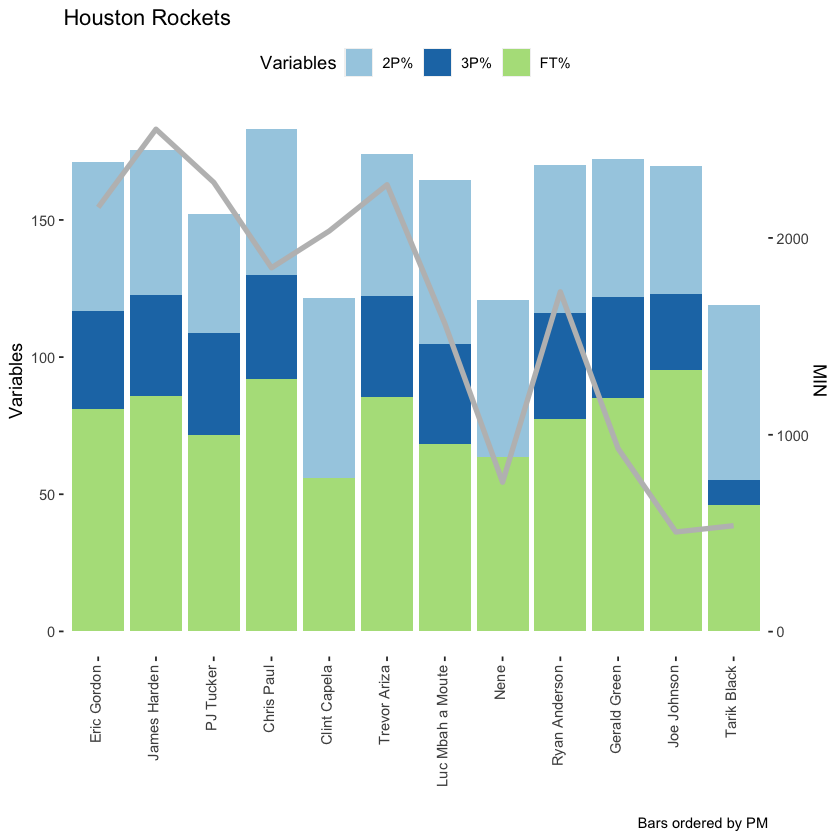

In [40]:
barline(data=Pbox.HR, id="Player",
       bars=c("P2p", "P3p", "FTp"), line="MIN",
       order.by="PM", labels.bars=c("2P%", "3P%", "FT%"),
       title="Houston Rockets")

This shows that players towards the left tend to have the highest played minutes, but not necessarily the best shooting performance

#### 1.3 Radial plots

In [43]:
Pbox.PG <- subset(Pbox, Player=="Russell Westbrook" |
                 Player=="Stephen Curry" |
                 Player=="Chris Paul" |
                 Player=="Kyrie Irving" |
                 Player=="Damian Lillard" |
                 Player=="Kyle Lowry" |
                 Player=="John Wall" |
                 Player=="Rajan Rondo" |
                 Player=="Kemba Walker")

In [44]:
attach(Pbox.PG)
X <- data.frame(P2M, P3M, FTM, REB=OREB+DREB, AST,
               STL, BLK)/MIN

In [45]:
detach(Pbox.PG)

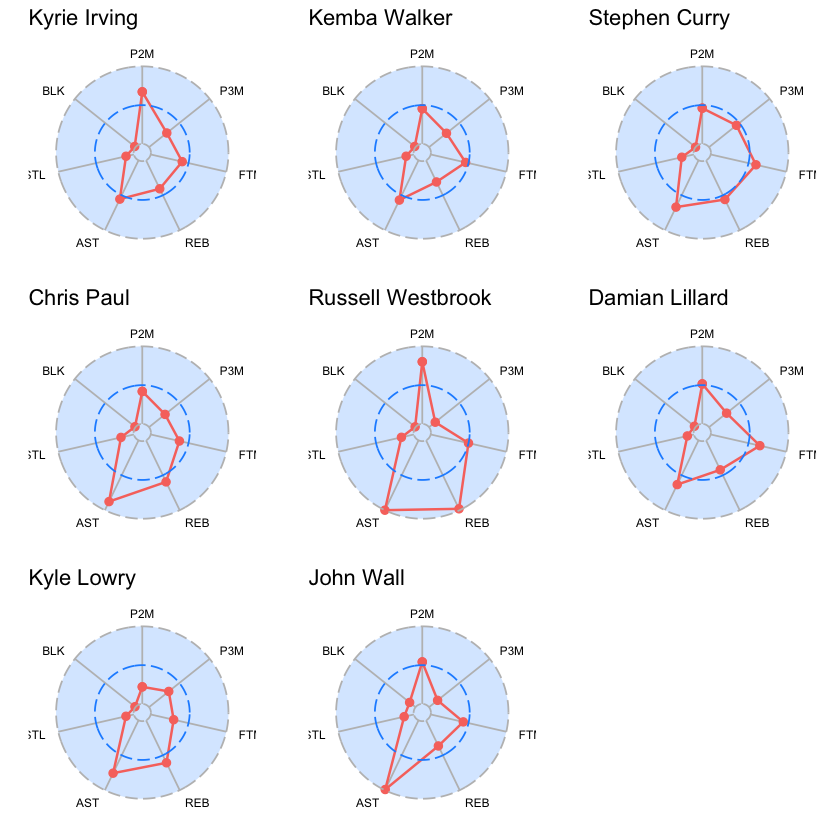

In [46]:
radialprofile(data=X, title=Pbox.PG$Player, std=FALSE)

^ Non-standardized variables. Dashed blue line: midpoint b/w minimum and maximum

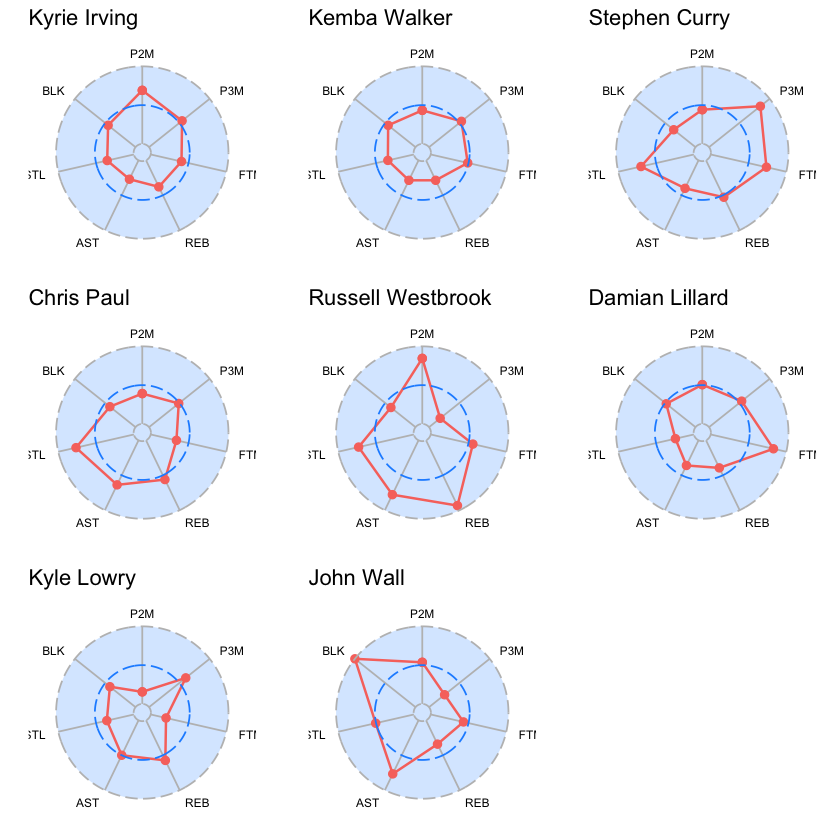

In [47]:
radialprofile(data=X, title=Pbox.PG$Player, std=TRUE)

Standardized using linear transformation

$Z = {X- \mu x \over \sigma x}$


where:

"μx" is the [[mean]] of the population.

"σ" is the [[standard deviation]] of the population.

#### 1.4 Scatter plots

In [50]:
Pbox.sel <- subset(Pbox, MIN>= 500)

In [51]:
attach(Pbox.sel)

In [52]:
X <- data.frame(AST, TOV, PTS)/MIN

In [53]:
detach(Pbox.sel)

Goal: investigate the relationship between assists and turnovers per minute of all players who have played at least 500 minutes, also highlight by color codes the points scored per minute

In [54]:
mypal <- colorRampPalette(c('blue', 'yellow', 'red'))

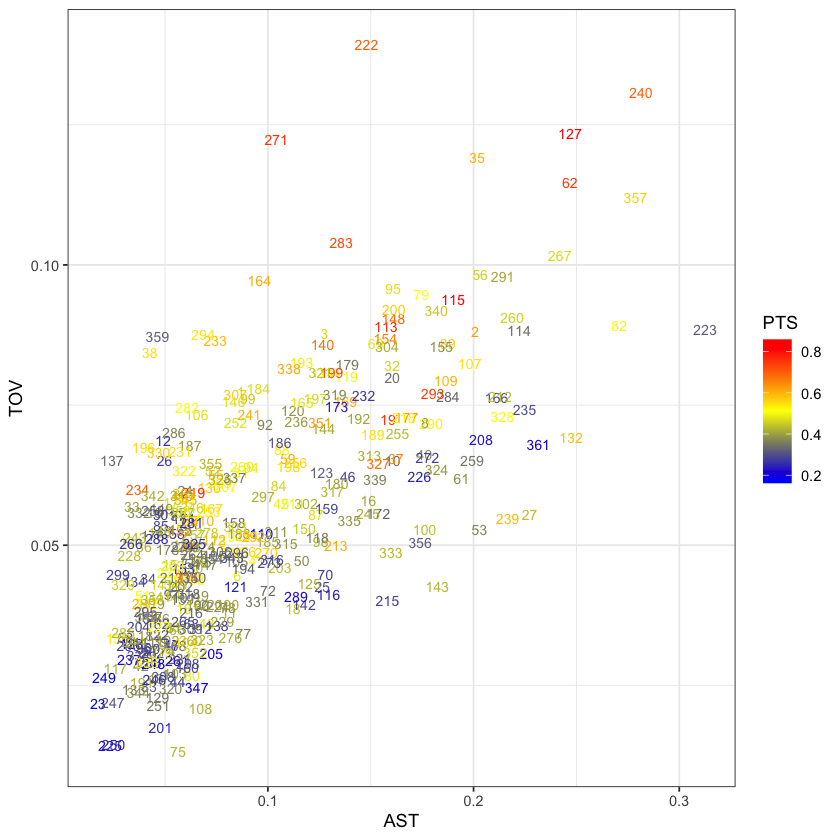

In [55]:
scatterplot(X, data.var=c("AST", "TOV"), z.var="PTS",
           labels=1:nrow(X), palette=mypal)

In [57]:
SAS <- which(Pbox.sel$Team=='San Antonio Spurs')

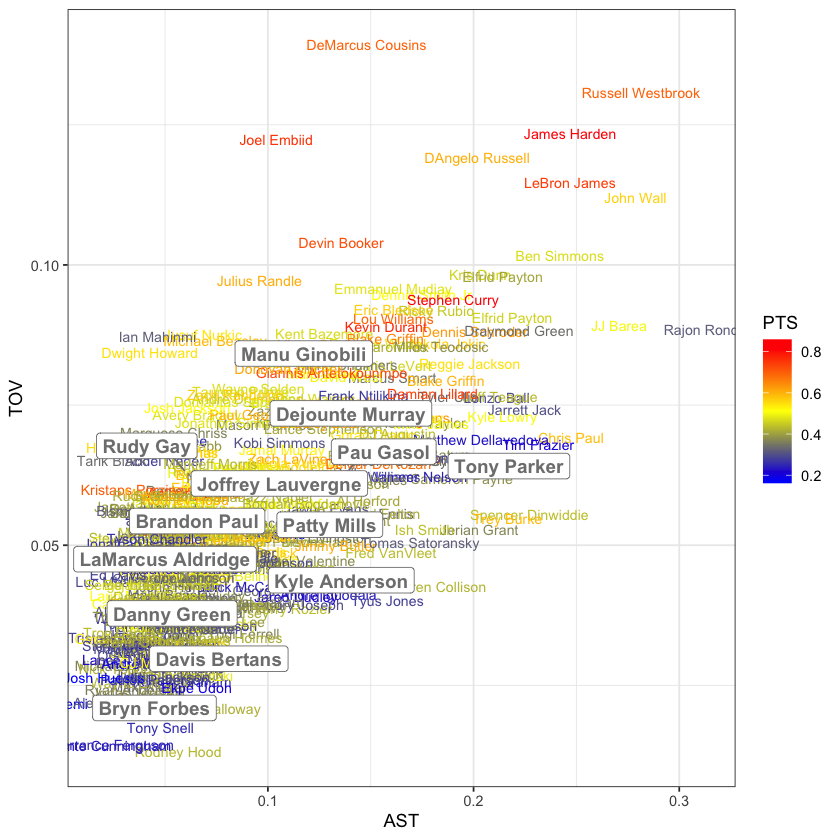

In [59]:
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

Warning message:
“Removed 331 rows containing missing values (geom_text).”
Warning message:
“Removed 13 rows containing missing values (geom_label_repel).”


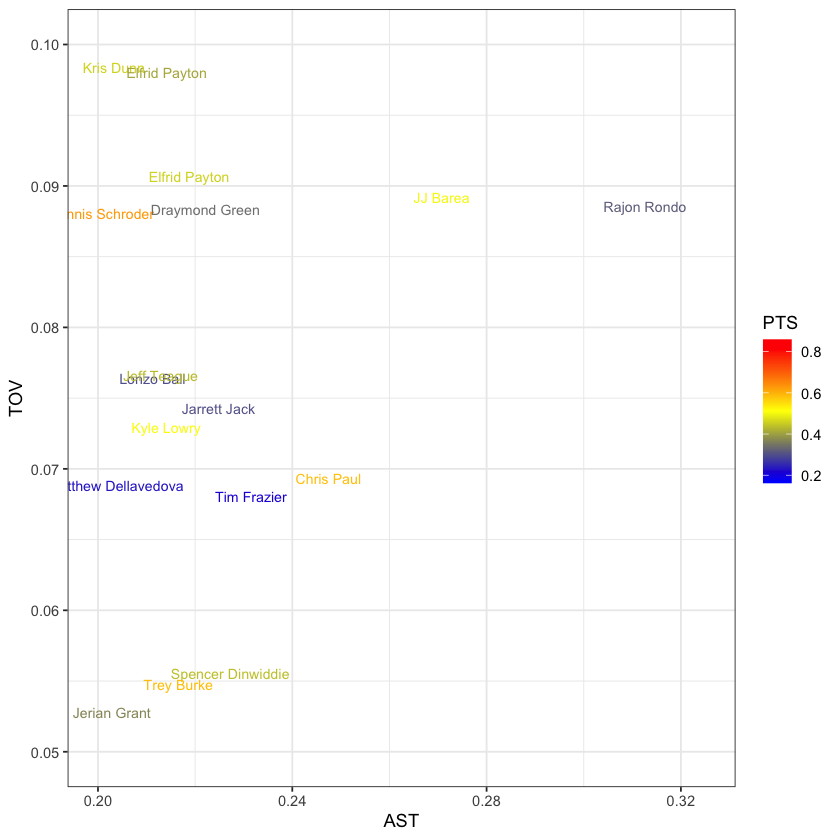

In [60]:
# zoom into [0.20, 0.325] x [0.05, 0.10]
scatterplot(X, data.var=c('AST', 'TOV'), z.var='PTS',
            zoom=c(0.20, 0.325, 0.05, 0.10),
            labels=Pbox.sel$Player, palette=mypal, subset=SAS)

What do we find?

Looking at the graph, we note that the number of turnovers tends to increase with increasing assist values. This reflects a clear insight: the more a player moves the ball, the more likely they turn it over.